# Lab 4: Simulation, Sampling, and Hypothesis Testing

## Due Saturday, May 13th at 11:59PM

Welcome to Lab 4! This covers the topics listed below. Click the links to read about these topics in the textbook.

- Simulation (see [CIT 9.3](https://inferentialthinking.com/chapters/09/3/Simulation.html))
- Sampling (see [CIT 10](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html))
- Hypothesis Testing (see [CIT 11](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html))

You should complete this entire lab so that all tests pass and submit it to Gradescope by 11:59PM on the due date.

In [1]:
import numpy as np
import babypandas as bpd
import math

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()
%reload_ext pandas_tutor

## 1. Dungeons and Dragons 🐉

In the fantasy role-playing game Dungeons & Dragons, each player takes on the role of a certain character.

To perform an action, a player rolls a 20-sided die, adds a "modifier" number to the roll, and compares the total to a threshold for success.  The value of the modifier depends on the player's character's competence in performing the action.

Throughout this question, we'll work with the following concrete example. Suppose Alice's character, a barbarian warrior named Roga, is trying to knock down a heavy door.  Alice rolls a 20-sided die, adds a modifier of 11 to the result (because her character is good at knocking down doors), and succeeds in knocking down the door if the total is at least 16.

**Question 1.1.** Write code that simulates this procedure.  Compute three values: 
- the result of Alice's 20-sided die roll (`roll_result`), 
- the result of her roll plus Roga's modifier of 11 (`modified_result`), and 
- a Boolean value indicating whether the action succeeded (`action_succeeded`).  

**Do not fill in any of the results manually**; the entire simulation should happen in code.

_Hint:_ A roll of a 20-sided die is a number chosen uniformly from the array `np.array([1, 2, 3, 4, ..., 20])`. You can store these possibilities in `possible_rolls`.  So a roll of a 20-sided die *plus 11* is a number chosen uniformly from that array, plus 11.

In [3]:
possible_rolls = np.array(range(1, 21)) # This generates array from 1 to 20 inclusive
roll_result = np.random.choice(possible_rolls)
modifier = 11
modified_result = roll_result + modifier
action_succeeded = modified_result >= 16

# The next line just prints out your results in a nice way
# once you're done.  You can delete it if you want.
print("On a modified roll of {:d}, Alice's action {}.".format(modified_result, "succeeded" if action_succeeded else "failed"))

On a modified roll of 18, Alice's action succeeded.


In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Let's repeat the above simulation 7 times. Below, assign `seven_reps` to an array of Booleans, where each element corresponds to whether a single simulation was successful. Then, determine the fraction of those simulations that succeeded, and assign your answer to `rough_success_chance`.

_**Note:**_ Do **not** use a `for`-loop here! Instead, call `np.random.choice` with multiple arguments (the second of which is the number of times you want to roll the die). The result will be an array. Remember that, for example, `arr + 1` adds the number 1 to every element in the array `arr`.

In [9]:
modified_rolls = np.random.choice(range(1, 21), size=7) + 11

# Determine if each roll is a success
seven_reps = modified_rolls >= 16

# Calculate the success chance
rough_success_chance = seven_reps.mean()

rough_success_chance

0.7142857142857143

In [10]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** What is the theoretical probability of Roga successfully knocking down the door when rolling a 20-sided die with a modifier of 11 and success threshold of 16? This is a math question, not a programming question.

In [13]:
theoretical_probability = len(range(5, 21))/20

In [14]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Let's try and put some of your work from 1.2 into a function. Below, write a Python function called `simulate_observations`.  It should take no arguments, and it should return an array of 7 numbers.  Each of the numbers should be the modified roll from one simulation.  **Then**, call your function once to compute an array of 7 simulated modified rolls.  Name that array `observations`.

Again, like in 1.2, there should be no need to use a `for`-loop.

In [17]:
modifier = 11 # Don't change this
num_observations = 7 # don't change this
def simulate_observations():
    """Produces an array of 7 simulated modified die rolls"""
    return np.random.choice(range(1, 21), size=7) + 11

observations = simulate_observations()
observations

array([26, 24, 21, 12, 16, 22, 18])

In [18]:
grader.check("q1_4")

q1_4 results: All test cases passed!

Now, let's pretend we **don't know** that Roga has a modifier of 11 for this action. Instead, we observe the modified roll (that is, the die roll plus the modifier of 11) from each of 7 of her attempts to knock down doors. We would like to **estimate** her modifier using just the 7 numbers in the array `observations`, and nothing else.

One straightforward way to do this involves looking at the smallest overall modified roll. Remember, the smallest number on a 20-sided die is 1, and the smallest possible modifier is 0.
- If we see that the smallest modified roll was 1, we know that the character's modifier must be 0. 
- If we see that the smallest modified roll is something larger than 1 -- say, 13 -- we can't say for certain what the character's modifier is. In this case, **we'll guess that at some point, the player rolled a 1**, and that their character's modifier is **13 - 1 = 12**. 
    - This works because, if we see enough modified rolls, one of them will have occurred when the player rolled a 1.

**Question 1.5.** Using this method, estimate `modifier` from `observations` and name that estimate `min_based_estimate`. If you're not sure what to do, read the previous paragraph again carefully.

In [21]:
min_based_estimate = min(observations) - 1
min_based_estimate

11

In [22]:
grader.check("q1_5")

q1_5 results: All test cases passed!

Another way to estimate the modifier involves the mean of `observations`. 
- If a character's modifier is zero, then the mean of a large number of their modified rolls will be close to the mean of 1, 2, ..., 20, which is 10.5. 
- If their modifier is $m$, then the mean of their modified rolls will be close to the mean of $1 + m$, $2 + m$, ..., $20 + m$,
which is 10.5 + $m$. 
- Since we can calculate the mean of the modified rolls, we can use this to estimate $m$.

**Question 1.6.** Write a function named `calculate_mean_based_estimate` that computes an estimate of the modifier using this method.  It should take an array of modified rolls (like the array `observations`) as its argument and return an estimate of `modifier` based on the mean of those numbers.

**_Note:_** It's okay if your `mean_based_estimate` is not an integer!

In [25]:
def calculate_mean_based_estimate(nums):
    """Estimate the roll modifier based on observed modified rolls in the array nums."""
    modified_rolls_df = bpd.DataFrame().assign(modified_rolls=nums)
    return modified_rolls_df.get('modified_rolls').mean() - 10.5

mean_based_estimate = calculate_mean_based_estimate(observations)
mean_based_estimate

9.357142857142858

In [26]:
grader.check("q1_6")

q1_6 results: All test cases passed!

Remember, the actual modifier was 11. Which was a better estimate, the `min_based_estimate` or the `mean_based_estimate`? Run the cell below to compare the different estimates to the actual modifier.

In [27]:
print("Actual modifier:", modifier)
print("Min-based estimate:", min_based_estimate)
print("Mean-based estimate:", mean_based_estimate)

Actual modifier: 11
Min-based estimate: 11
Mean-based estimate: 9.357142857142858


Which estimation strategy do you think is better in general? Does the better estimation strategy change as the number of observations grows? Does the value of the actual modifier matter? Feel free to explore these questions or answer some questions of your own!

In [28]:
# Play around, it's good practice!


## 2. Therapeutic Touch 👆

Therapeutic Touch (TT) is an energy therapy that practitioners claim can promote health and relaxation. Practitioners place their hands near a patient and say they are able to detect and manipulate the patient's so-called Human Energy Field (HEF). 
TT was popular throughout the 20th century and was touted as a great way to bring balance to a person's health. 

### Emily Rosa's Experiment

Emily Rosa was a 4th grade student who had wide exposure to the world of TT due to her parents, who were both medical practitioners and skeptics of the idea of TT. For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. 

Emily's experiment was clean, simple, and effective. Due to her parents' occupations in the medical field, she had wide access to people who claimed to be TT practitioners. 

Emily used 21 TT practitioners for her experiment. She would separate herself from the practitioner with a board, so they couldn't see her, and she'd ask them to place both hands through an opening in the board. Emily would flip a coin. Depending on how the coin landed, she would place her hands above the practitioner's left hand or the practitioner's right hand. The TT practitioner would then have to detect Emily's HEF and specify whether Emily was hovering above their left hand or their right hand. Overall, in 210 samples, the practitioner picked the correct hand 44% of the time. 

Emily's main goal here was to test whether or not the TT practitioners' guesses were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not some treatment has an effect. This is *not* the same as testing whether the treatment actually works as intended. 

We will now begin to formulate Emily's experiment in terms of the terminology we've learned in this course, particularly in Lecture 16. 

<!-- BEGIN QUESTION -->

**Question 2.1.** What are the null and alternative hypotheses for Emily's experiment? Write both of your answers in the cell below.

<!--
BEGIN QUESTION
name: q2_1
manual: true
-->

Null Hypothesis is TT practitioners' guesses are random with a success rate of 0.5.

Alternative Hypothesis is TT practitioners' success rate is significantly different from 0.5.

<!-- END QUESTION -->



**Question 2.2.** Remember that the practitioner got the correct answer 44% (i.e. 0.44) of the time. According to the null hypothesis, on average, what proportion of times do we expect the practitioner to guess the correct hand? Make sure your answer is between 0 and 1. 

In [31]:
expected_correct = 0.5
expected_correct

0.5

In [32]:
grader.check("q2_2")

q2_2 results: All test cases passed!

The goal now is to see if our deviation from this expected proportion of correct answers is due to something other than chance. 

**Question 2.3.** Which of the following is the best statistic for testing this model? Assign `best_ts` to 1, 2, or 3.

1. The difference between the expected proportion of correct answers and the actual proportion of correct answers.
2. The absolute difference between the expected proportion of correct answers and the actual proportion of correct answers.
3. The sum of the expected proportion of correct answers and the actual proportion of  correct answers.

In [37]:
best_ts = 2
best_ts

2

In [38]:
grader.check("q2_3")

q2_3 results: All test cases passed!

_**Note:**_ If you initially answered 2.3 incorrectly, we'd suggest reviewing the end of Lecture 15.

**Question 2.4.** Define the function `test_statistic` which takes in an expected proportion and an actual proportion, and returns the value of the test statistic chosen above (as a proportion between 0 and 1). Assume that your inputs are proportions between 0 and 1.

In [39]:
def test_statistic(expected_prop, actual_prop):
    return abs(expected_prop - actual_prop)

In [40]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Use your newly defined function to calculate the observed test statistic from Emily's experiment. 

In [45]:
observed_test_statistic = test_statistic(0.5, 0.44)
observed_test_statistic

0.06

In [46]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Is this test statistic likely if the null hypothesis is true? Or is the deviation from the expected proportion due to something other than chance?**

In order to answer this question, we must simulate the experiment as though the null hypothesis was true, and calculate the test statistic for each simulation.

**Question 2.6.** To begin simulating, start by creating an array which has two items in it. The first item should be the proportion of times, assuming the null hypothesis is true, a TT practictioner picks the correct hand. The second item should be the proportion of times, under the same assumption, that the TT practicioner picks the incorrect hand. Assign `model_proportions` to this array. 

After this, simulate, using the `np.random.multinomial` function, Emily repeating this process 210 times (as done in real life), and assign the proportion of correct answers to `simulation_proportion`. Lastly, define `one_test_statistic` to the test statistic of this one simulation. (What is the expected proportion of correct answers, according to the null? Refer to your answer to 2.2.)

_Hint:_ See Lecture 15 or [the documentation for `np.random.multinomial`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html) for guidance.

In [47]:
model_proportions = np.array([0.5, 0.5]) # Assuming null hypothesis, the practitioner is equally likely to guess correctly or incorrectly
simulation = np.random.multinomial(210, model_proportions)
simulation_proportion = simulation[0] / 210
one_test_statistic = test_statistic(0.5, simulation_proportion)

In [48]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7.** Let's now see what the distribution of test statistics is actually like under our null hypothesis. Assign `simulated_test_statistics` to an array of 10,000 test statistics that you simulate, under the assumption that the null hypothesis is true.

_Hint:_ Your code here will follow the standard simulation pattern; see Lecture 15 again for an example. Also, you'll need to re-use most of the code you wrote in 2.6.

In [54]:
num_repetitions = 10000

simulated_test_statistics = np.array([])

for _ in range(num_repetitions):
    simulation = np.random.multinomial(210, model_proportions)
    simulation_proportion = simulation[0] / 210
    one_test_statistic = test_statistic(0.5, simulation_proportion)
    simulated_test_statistics = np.append(simulated_test_statistics, one_test_statistic)


In [55]:
grader.check("q2_7")

q2_7 results: All test cases passed!

Let's view the distribution of the simulated test statistics under the null, and visually compare how the observed test statistic lies amongst the rest. 

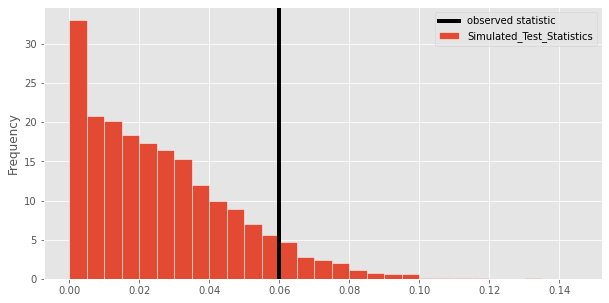

In [56]:
t = bpd.DataFrame().assign(Simulated_Test_Statistics = simulated_test_statistics)
t.plot(kind='hist', density=True, ec='w', bins=np.arange(0, 0.15, 0.005), figsize=(10, 5))
plt.axvline(x=observed_test_statistic, color='black', label='observed statistic', linewidth=4)
plt.legend();

We can make a visual argument as to whether or not we believe the observed test statistic is likely to occur under the null, or we can use the definition of p-values to help us make a more formal argument. 

**Question 2.8.** Assign `p_value` to the integer corresponding to the correct definition of what a p-value really is. 

1. The chance, under the null hypothesis, that the test statistic is equal to the value that was observed.
2. The chance, under the null hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the alternative.
3. The chance, under the alternative hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the null.
4. The number of times, under the null hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the alternative.

In [57]:
p_value = 2
p_value

2

In [58]:
grader.check("q2_8")

q2_8 results: All test cases passed!

**Question 2.9.** Using the definition above, calculate the p-value for Emily's experiment. 

*Hints:*
- Do large values of our test statistic make you lean towards the null or alternative?
- See Lecture 16 or [CIT 11.1](https://inferentialthinking.com/chapters/11/1/Assessing_a_Model.html) for examples.

In [68]:
emily_p_val = np.count_nonzero(simulated_test_statistics >= observed_test_statistic) / len(simulated_test_statistics)
emily_p_val

0.0773

In [69]:
grader.check("q2_9")

q2_9 results: All test cases passed!

If our p-value is less than or equal to 0.05, then this is in favor of our alternative and we reject the null hypothesis. Otherwise, we do not have enough evidence against our null hypothesis. **Note that this does not say we side in favor with the null hypothesis and accept it, but rather, that we just fail to reject it.**

This should help you make your own conclusions about Emily Rosa's experiment. 

Therapeutic Touch fell out of use after this experiment, which was eventually accepted into one of the premier medical journals. TT practitioners hit back and accused Emily and her family of tampering with the results, while some claimed that Emily's bad spiritual mood towards Therapeutic Touch made it difficult to read her HEF. Whatever it may be, Emily's experiment is a classic example about how anyone, with the right resources, can test anything they want!

## 3. Delayed Flights? ✈️

In October 2022, Spirit Airlines and JetBlue Airlines [announced that they're merging](https://www.nytimes.com/2022/10/19/business/spirit-airlines-jetblue-merger.html) into a single, larger airline. They haven't yet come up with a name for the new merged airline.

Let's fast-forward six months into the future, and let's pretend they decided to call the new airline Jetspear. Jetspear is off to a good start, and reports that a whopping 94% of their flights are on-time (meaning that, supposedly, only 6% of their flights are delayed). King Triton, UCSD's trusty mascot, flew on Jetspear 100 times over the past six months, and had 12 delayed flights.

King Triton is angry, and believes that Jetspear is lying. But Jetspear is adamant that they are right. 

<!-- BEGIN QUESTION -->

**Question 3.1.** You decide to investigate the situation by running a hypothesis test. What are the null and alternative hypotheses? Write both of your answers in the cell below.

<!--
BEGIN QUESTION
name: q3_1
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



**Question 3.2.** Assign `null_probabilities` to a two-item *array* such that the first element is the chance that a Jetspear flight is on-time, and the second element is the chance that a Jetspear flight is delayed, under the assumptions of the **null hypothesis**.

In [70]:
null_probabilities = np.array([0.94, 0.06])
null_probabilities

array([0.94, 0.06])

In [71]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Using the array you defined above, simulate the act of flying on 100 Jetspear flights, 10000 times. Create an array called `simulated_num_delayed` containing the **number of delayed flights** in each simulation.

In [72]:
num_simulations = 10000
num_flights = 100

simulated_num_delayed = np.random.choice([0, 1], p=null_probabilities, size=(num_simulations, num_flights)).sum(axis=1)

In [73]:
grader.check("q3_3")

q3_3 results: All test cases passed!

Run the cell below to visualize the results of the simulation.

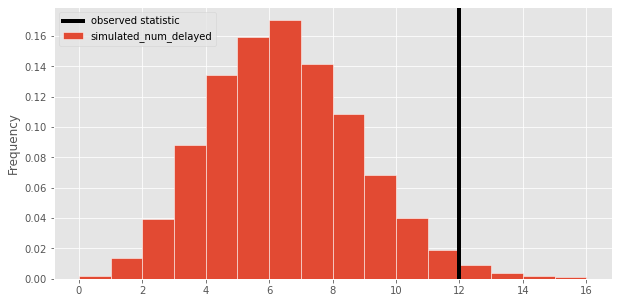

In [74]:
bpd.DataFrame().assign(simulated_num_delayed=simulated_num_delayed) \
               .plot(kind='hist', density=True, bins=np.arange(17), ec='w', figsize=(10, 5))
plt.axvline(x=12, color='black', label='observed statistic', linewidth=4)
plt.legend();

**Question 3.4.** Use the results of the simulation to calculate the p-value for this hypothesis test and assign your answer to `delay_p_val`.

In [75]:
observed_num_delayed = 12
delay_p_val = np.count_nonzero(simulated_num_delayed >= observed_num_delayed) / num_simulations
delay_p_val

0.0157

In [76]:
grader.check("q3_4")

q3_4 results: All test cases passed!

You should be able to tell, both from the histogram and from the p-value you calculated, that Jetspear seems to have more delayed flights than they claim!

# Finish Line 🏁

Congratulations! You are done with Lab 4.

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
5. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
6. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [77]:
# For your convenience, you can run this cell to run all the tests at once!
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

q2_8 results: All test cases passed!

q2_9 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!